#1.5.9 Feature Matching

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [9]:
img1 = cv2.imread('man1.png',0) # queryImage
img2 = cv2.imread('man2.png',0) # trainImage

In [10]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

In [11]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

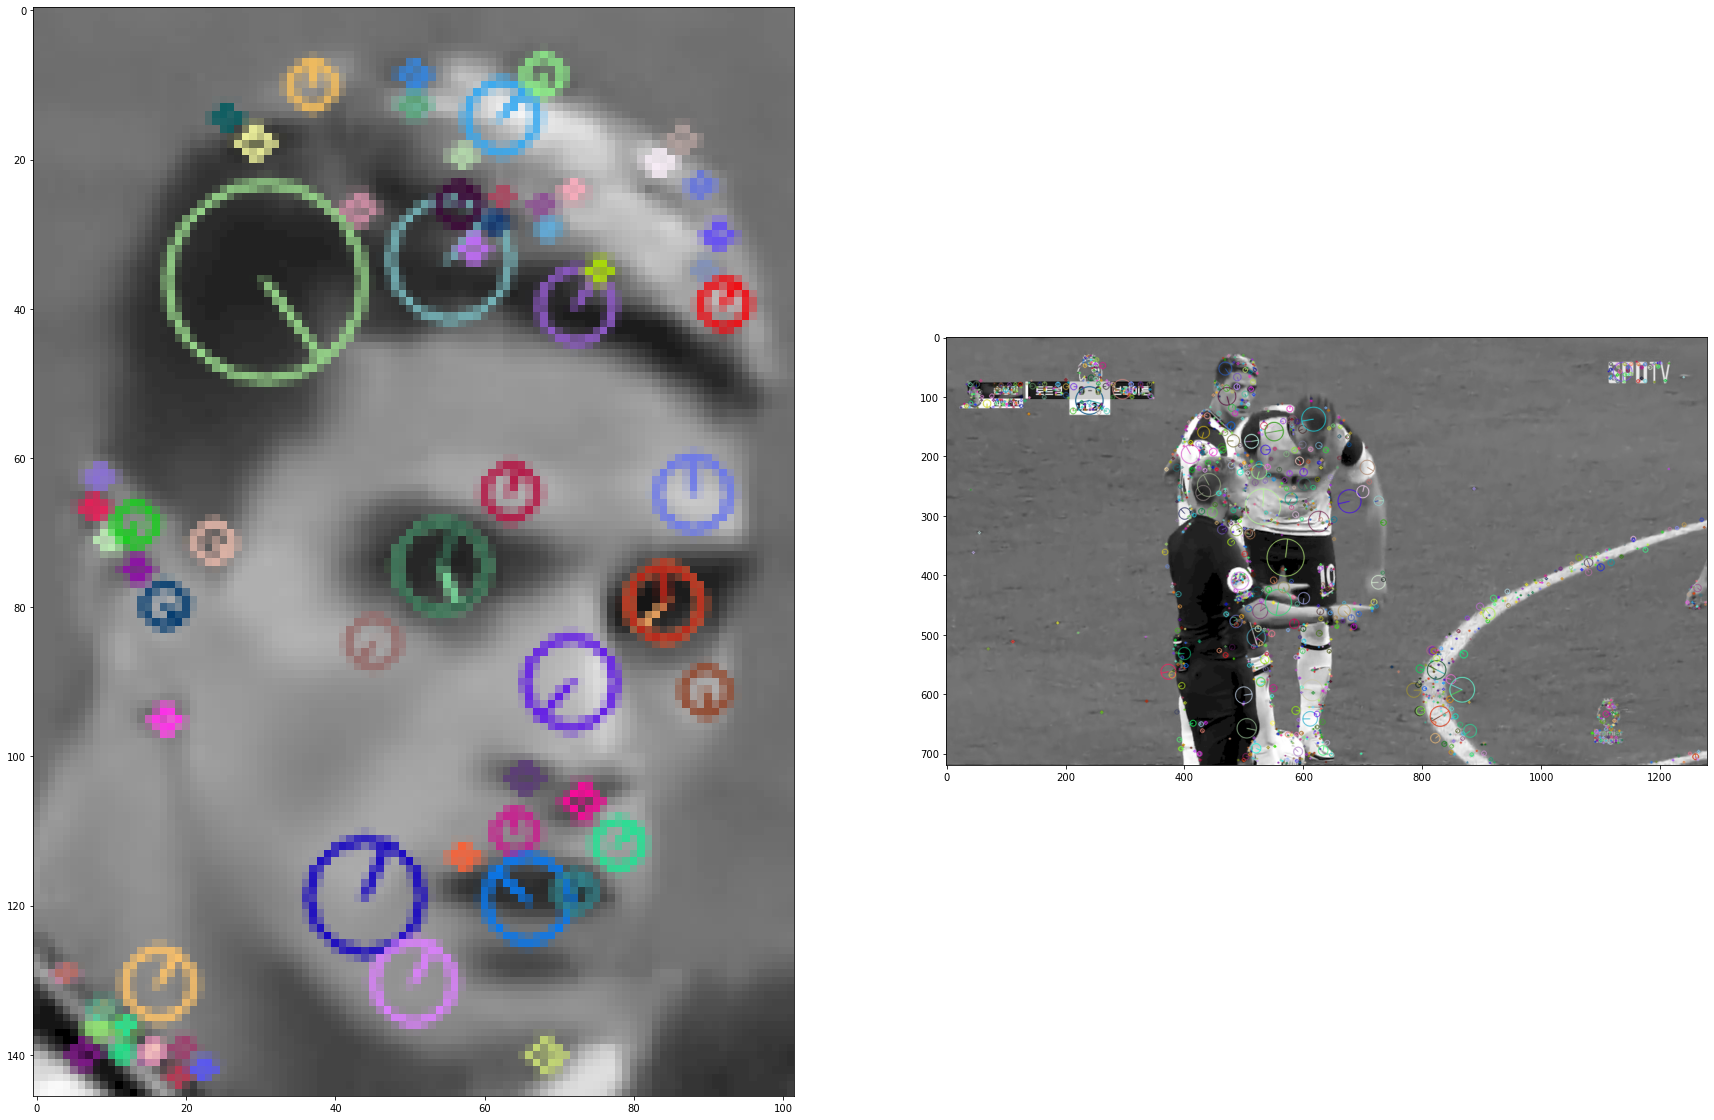

In [12]:
img1v = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
img2v = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (30,26))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [ ]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [ ]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()

#Brute-Force Matching with SIFT Descriptors and Ratio Test

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)

plt.imshow(img3),plt.show()